<a href="https://colab.research.google.com/github/Sneha-creat/Skin-Cancer-Detction-Model-using-CNN/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/skindiseasedataset/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/skindiseasedataset/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

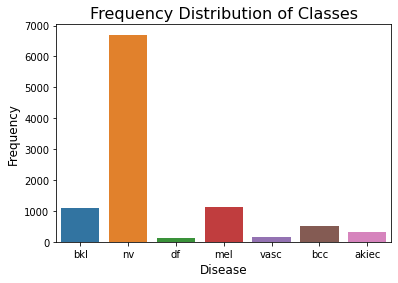

In [ ]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

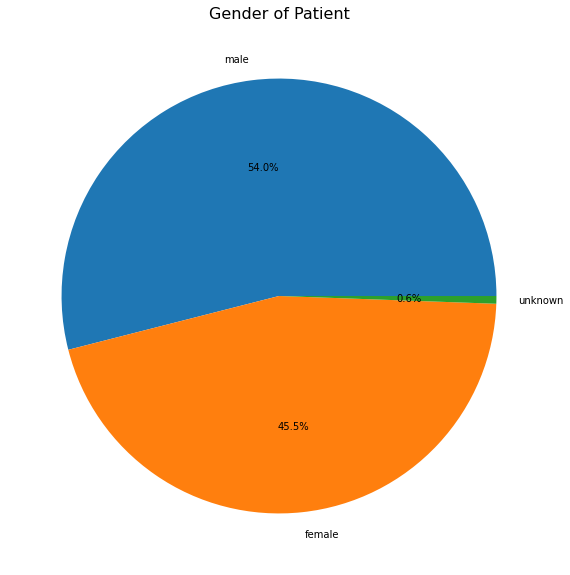

In [ ]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

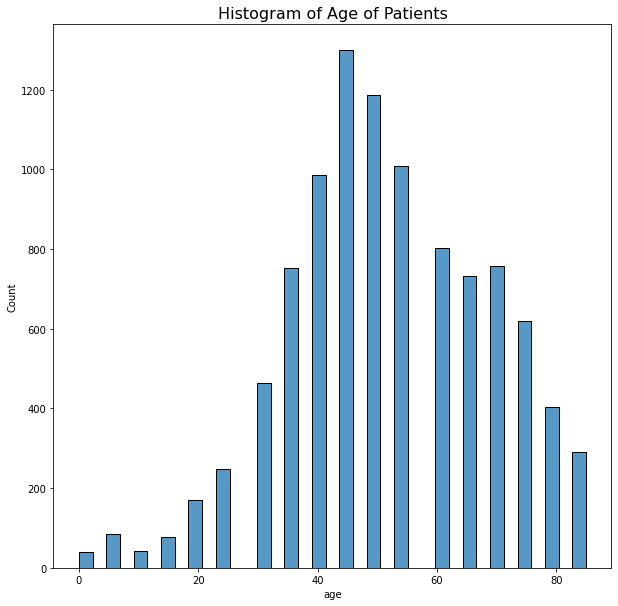

In [ ]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

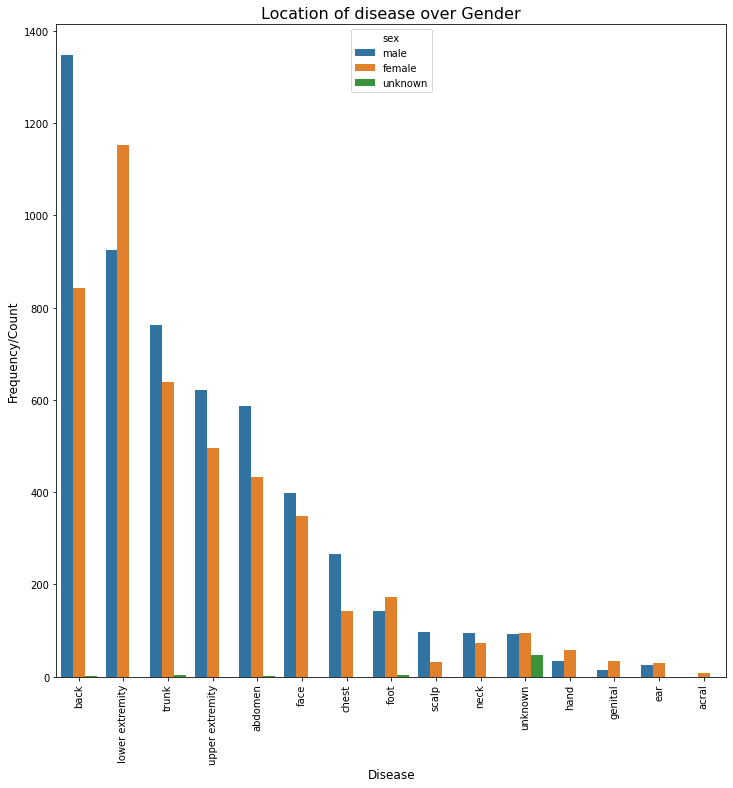

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.2329 - accuracy: 0.5225
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 42s 173ms/step - loss: 1.2329 - accuracy: 0.5225 - val_loss: 0.9089 - val_accuracy: 0.6547
Epoch 2/20
235/235 [==============================] - ETA: 0s - loss: 0.7056 - accuracy: 0.7356
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 41s 174ms/step - loss: 0.7056 - accuracy: 0.7356 - val_loss: 0.5747 - val_accuracy: 0.7855
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.8266
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 40s 172ms/step - loss: 0.4673 - accuracy: 0.8266 - val_loss: 0.3922 - val_accuracy: 0.8542
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 0.3175 - accuracy: 0.8842
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 42s 178ms/step 

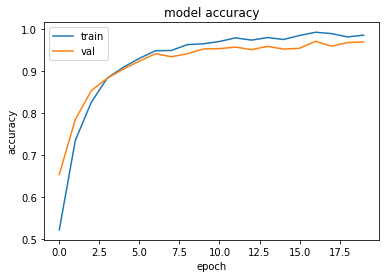

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

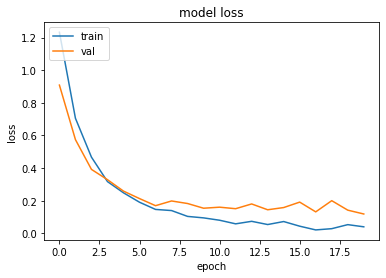

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('/content/best_model (1).h5')

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 3s - loss: 0.2284 - accuracy: 0.9321 - 3s/epoch - 11ms/step


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00


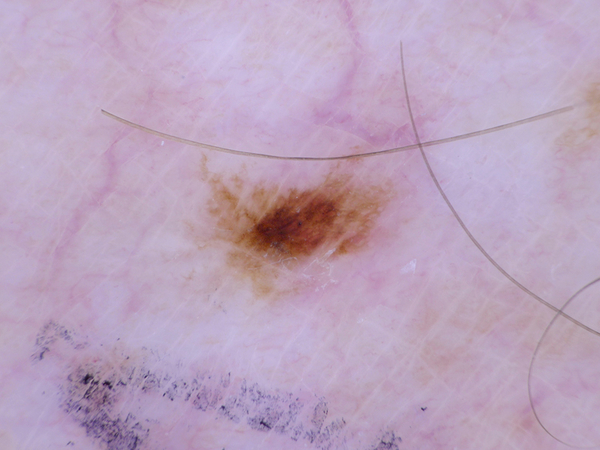

1/1 [==============================] - 0s 164ms/step
('nv', ' melanocytic nevi')


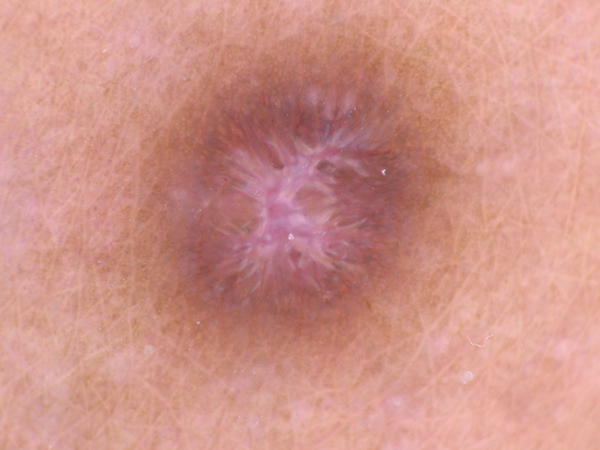

1/1 [==============================] - 0s 39ms/step
('bcc', ' basal cell carcinoma')


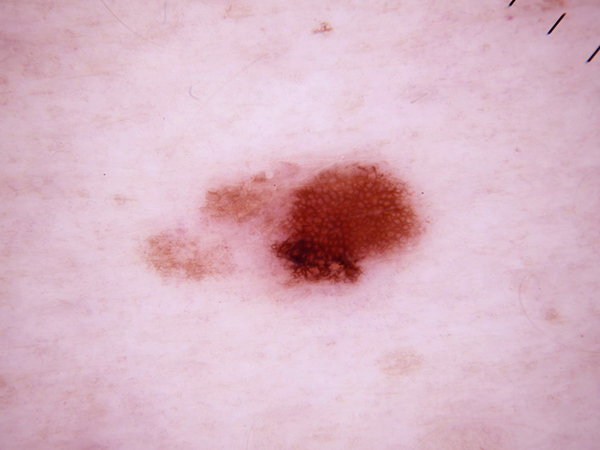

1/1 [==============================] - 0s 25ms/step
('bcc', ' basal cell carcinoma')


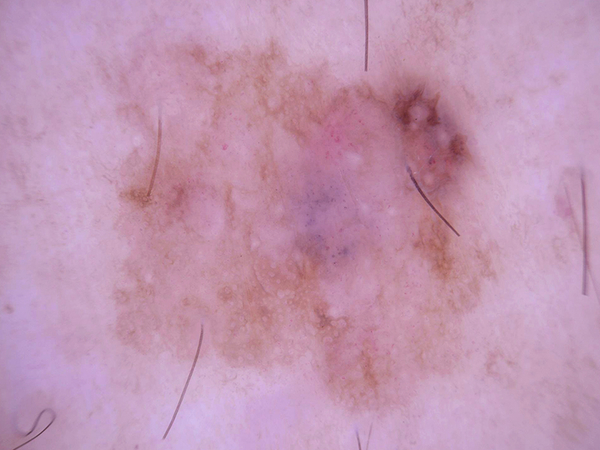

1/1 [==============================] - 0s 25ms/step
('nv', ' melanocytic nevi')


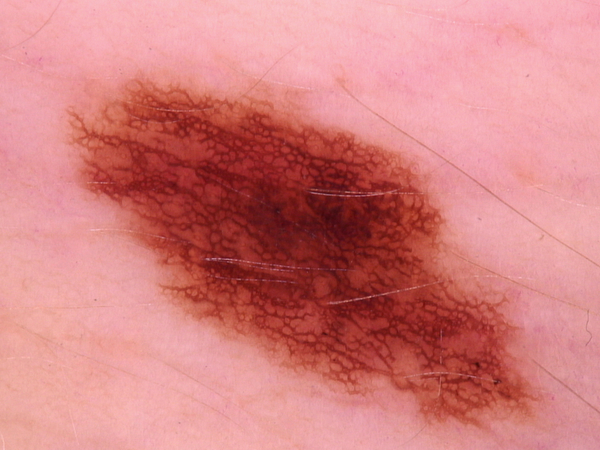

1/1 [==============================] - 0s 21ms/step
('nv', ' melanocytic nevi')


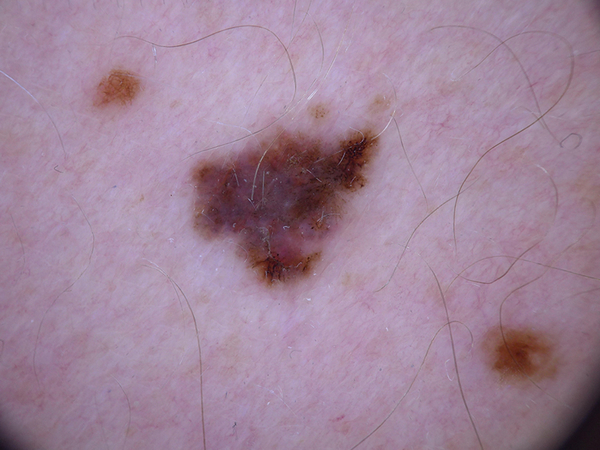

1/1 [==============================] - 0s 21ms/step
('bcc', ' basal cell carcinoma')


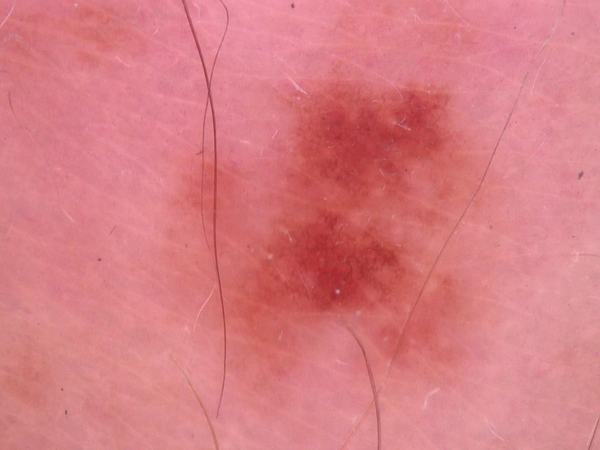

1/1 [==============================] - 0s 20ms/step
('bcc', ' basal cell carcinoma')


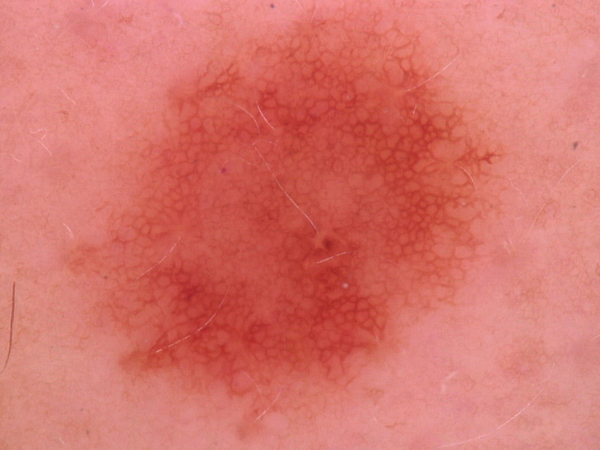

1/1 [==============================] - 0s 25ms/step
('nv', ' melanocytic nevi')


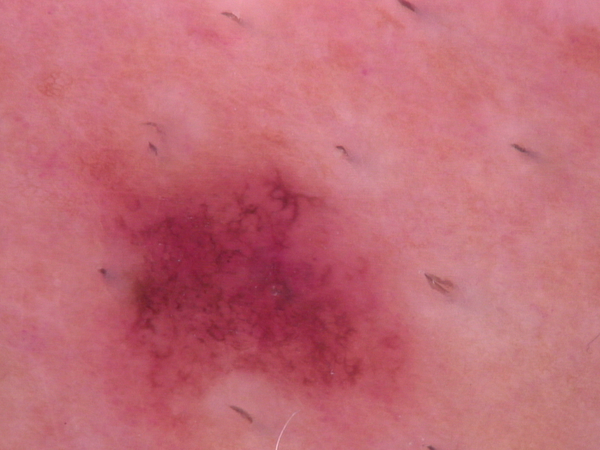

1/1 [==============================] - 0s 36ms/step
('bcc', ' basal cell carcinoma')


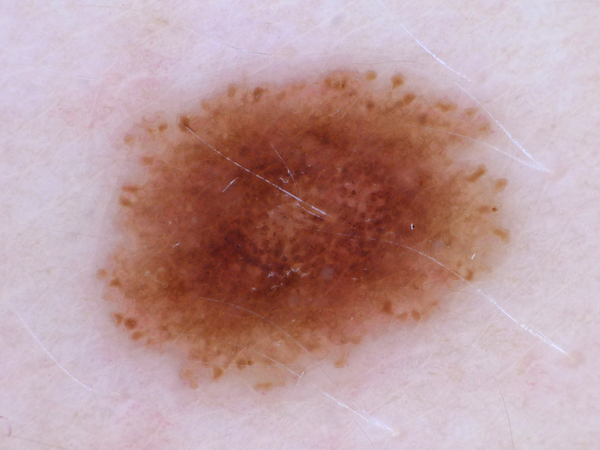

1/1 [==============================] - 0s 46ms/step
('nv', ' melanocytic nevi')


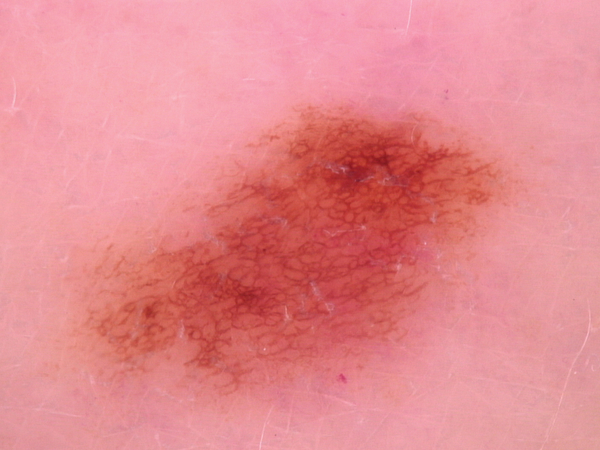

1/1 [==============================] - 0s 65ms/step
('bcc', ' basal cell carcinoma')


In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/skindiseasedataset/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break       

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def predict_skin_cancer(model, classes):
    # Ask user to input the image path
      img_path = input("Enter the path of the image: ")
      img = cv2.imread(img_path)
      cv2_imshow(img)
      img = cv2.resize(img, (28, 28))
      img = img.astype('float32') / 255.
      result = model.predict(img.reshape(1, 28, 28, 3))
      max_prob = max(result[0])
      class_ind = list(result[0]).index(max_prob)
      class_name = classes[class_ind]
      print("Please wait few second, your picture is processing.The diagnosis shows that you are having ",class_name)
      return class_name
      

In [ ]:
model.load_weights('best_model.h5')

In [ ]:
from keras.models import load_model

# Load the model from the saved file /content/best_model.h5
model = load_model("best_model.h5")

-------------------------------------------------------------CHATBOT-------------------------------------------------------------

In [ ]:
import nltk
import numpy as np
import string # to process standard python strings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt') # first-time use only
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def LemTokens(tokens):
   return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
   return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey","ai","next","hiii","hi I for you","heyy","cool")

GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me","You're welcome, this is my job","You'd better talk with the doctor and you need further treatment"]

In [ ]:
def greeting(sentence):
   for word in sentence.split():
       for i in range(len(GREETING_INPUTS)):
            if word.lower() == GREETING_INPUTS[i]:
                return GREETING_RESPONSES[i]

def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [ ]:
f=open('/content/symtom.txt','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase

sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences
word_tokens = nltk.word_tokenize(raw)# converts to list of words

lemmer = nltk.stem.WordNetLemmatizer()

In [ ]:
# cnn part
import numpy as np
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from PIL import Image, UnidentifiedImageError
from google.colab.patches import cv2_imshow

def is_path(str):
    pics = ['bmp','png','jpg','jpeg','tiff','gif', 'pcx', 'tga', 'exif', 'fpx', 'svg','psd','cdr','pc','dxf','ufo','eps','ai','raw']
    if (str.find('.') == -1):
        return -1
    elif(str[str.rfind('.')+1::] in pics):
        return str
    else:
        return -1


###################################I FOR YOU##############################################
Hiii Welcome to I FOR YOU. I am here to tell you the diagnosis of your skin picture. If you want to exit, type 'bye'.
Are you ready to provide your skin picture?
You: hi
Chatbot: Hii,I am here to tell you the diagnosis of your skin picture.Are you ready to provide your skin picture?
You: yes
Enter the path of the image: /content/ISIC_0024307.jpg


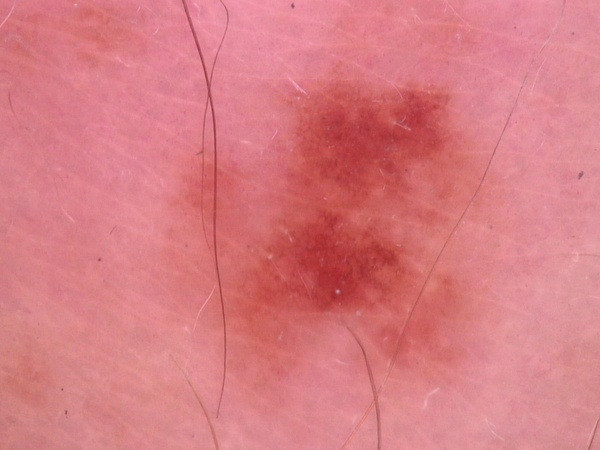

1/1 [==============================] - 0s 29ms/step
Please wait few second, your picture is processing.The diagnosis shows that you are having  ('bcc', ' basal cell carcinoma')
Don't worry!!!Do you have any other queries related to this disease(Y/N)?
You: Y
Chatbot: Okay then,what do you wanted to know causes/treatments.Specify it with disease(example:causes of bcc)
You: causes of bcc
Chatbot: dferevdh
You: causes of acc
Chatbot: hsjjdh
You: thanks
Chatbot: It's my pleasure!
You: is it true
Chatbot: Iam an AI machine.I can predict the disease to some extend only.
You: okie then bye
Chatbot: Bye,Take care
You: bye bot
Chatbot: Bye,Take care
You: bye
Chatbot: Bye, take care!


In [ ]:
import spacy
import random
import json

# load the intents file
with open('/content/symtom.txt') as file:
    intents = json.load(file)['intents']

# load the small English model of Spacy
nlp = spacy.load("en_core_web_sm")

# define a function to preprocess the input text
def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# define a function to get the response for a given input text
def get_response(text, ready_to_provide_picture):
    # preprocess the input text
    words = preprocess(text)
    
    # find the intent that best matches the input text
    max_score = 0
    best_intent = None
    for intent in intents:
        if intent['tag'] == 'provide_picture' and not ready_to_provide_picture:
            continue
        score = 0
        for pattern in intent['patterns']:
            pattern_words = preprocess(pattern)
            for word in words:
                if word in pattern_words:
                    score += 1
        if score > max_score:
            max_score = score
            best_intent = intent
        

    # generate a random response from the matched intent
    if best_intent is not None and max_score > 0:
        response = random.choice(best_intent['responses'])
        if best_intent['tag'] == 'provide_picture':
          ready_to_provide_picture = True 
    else:
      response=predict_skin_cancer(model, classes)
      ready_to_provide_picture = True 
        
    return response, ready_to_provide_picture

# define a function to start the chatbot
def start_chatbot():
    print("###################################I FOR YOU##############################################")
    print("Hiii Welcome to I FOR YOU. I am here to tell you the diagnosis of your skin picture. If you want to exit, type 'bye'.")
    print("Are you ready to provide your skin picture?")
    ready_to_provide_picture = False
    while True:
        text = input("You: ")
        response, ready_to_provide_picture = get_response(text, ready_to_provide_picture)
        if text.lower() == 'bye':
            print("Chatbot: Bye, take care!")
            break
        elif ready_to_provide_picture:
          print("Don't worry!!!Do you have any other queries related to this disease(Y/N)?") 
          response, ready_to_provide_picture = get_response(text, ready_to_provide_picture)
          ready_to_provide_picture = False
        else:
            print("Chatbot:", response)
            if response == "Okay, bye!":
                print("Chatbot: Do you have any queries related to skin cancer?")

# start the chatbot
start_chatbot()